# Models comparison

In [180]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [196]:
def interpolate(n1, n2, n):
    diff = (n2 - n1) / (n + 1)
    return [n1 + diff * i for i in range(1, n+1)]

In [207]:
def expand_array(original, m):
    n = len(original)

    idxs = np.round(np.linspace(0, m-1, n)).astype(int)

    sol = np.zeros(m)
    sol[idxs] = original

    n1_idx = 0
    n1 = original[0]
    i = 1

    while i < m:
        if sol[i] != 0:
            idxs_change = range(n1_idx + 1, i)
            values_interp = interpolate(n1, sol[i], i - n1_idx - 1)
            sol[idxs_change] = values_interp

            n1_idx = i
            n1 = sol[i]
        
        i += 1


    return sol

In [37]:
tpr_rf = [joblib.load(f'rf_{i}.joblib') for i in range(10)]
mean_rf = joblib.load('rf_mean.joblib')

In [38]:
tpr_fn = [joblib.load(f'compgcn_tpr_{i}.joblib') for i in range(10)]
mean_fn = joblib.load('compgcn_mean.joblib')

In [39]:
tpr_care = [joblib.load(f'care_tpr_{i}.joblib') for i in range(10)]
mean_care = joblib.load(f'care_mean.joblib')

In [ ]:
tpr_transe = [joblib.load(f'transe_tpr_{i}.joblib') for i in range(10)]
mean_transe = joblib.load(f'transe_mean.joblib')
fpr_transe = joblib.load(f'transe_fpr.joblib')

In [ ]:
tpr_inductive = [joblib.load(f'inductive_tpr_{i}.joblib') for i in range(10)]
mean_inductive = joblib.load(f'inductive_mean.joblib')
fpr_inductive = joblib.load(f'inductive_fpr.joblib')

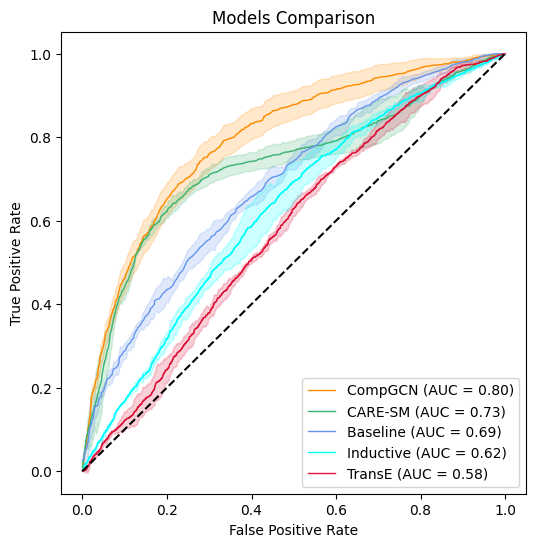

In [226]:
fig, ax = plt.subplots(figsize=(6, 6))

# Corresponding FPR values (assumed to be the same across runs or fixed)
fpr_values = np.linspace(0, 1, num=len(tpr_rf[0]))


#mean_tpr = np.mean(tpr_runs, axis=0)
std_rf = np.std(tpr_rf, axis=0)
std_fn = np.std(tpr_fn, axis=0)
std_care = np.std(tpr_care, axis=0)
std_transe = np.std(tpr_transe, axis=0)
std_inductive = np.std(tpr_inductive, axis=0)

# Plot the average ROC curve
plt.plot(fpr_values, mean_fn, label=f'CompGCN (AUC = 0.80)', linewidth=1, color='darkorange')
plt.plot(fpr_values, mean_care, label=f'CARE-SM (AUC = 0.73)', linewidth=1, color='mediumseagreen')
plt.plot(fpr_values, mean_rf, label=f'Baseline (AUC = 0.69)', linewidth=1, color='cornflowerblue')
plt.plot(fpr_inductive, mean_inductive, label=f'Inductive (AUC = 0.62)', linewidth=1, color='aqua')
plt.plot(fpr_transe, mean_transe, label=f'TransE (AUC = 0.58)', linewidth=1, color='crimson')

# Plot the variability as a shaded area (mean ± std)

plt.fill_between(fpr_values, 
                 mean_fn - std_fn, 
                 mean_fn +std_fn, 
                 color='darkorange', alpha=0.2)

plt.fill_between(fpr_values, 
                 mean_rf - std_rf, 
                 mean_rf + std_rf, 
                 color='cornflowerblue', alpha=0.2)

plt.fill_between(fpr_values, 
                 mean_care - std_care, 
                 mean_care + std_care, 
                 color='mediumseagreen', alpha=0.2)

plt.fill_between(fpr_transe, 
                 mean_transe - std_transe, 
                 mean_transe + std_transe, 
                 color='crimson', alpha=0.2)

plt.fill_between(fpr_inductive, 
                 mean_inductive - std_inductive, 
                 mean_inductive + std_inductive, 
                 color='aqua', alpha=0.2)

plt.plot(fpr_values, fpr_values, linestyle="dashed", color='black')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models Comparison')
plt.legend(loc='lower right')

# Show plot
plt.show()
